In [16]:

# Importing necessary libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

In [17]:
# Step 1: Ask user how many times to run the simulation
def get_simulation_runs():
    while True:
        try:
            runs = int(input("Enter the number of simulations (e.g. between 10,000 and 40,000):"))
            if 10000 <= runs <= 40000:
                return runs
            else:
                print("Please enter a value between 10,000 and 40,000.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

In [18]:
# Step 2: Get width range from user
def get_width_range():
    while True:
        try:
            min_width = float(input("Enter the minimum width (e.g. 140): "))
            max_width = float(input("Enter the maximum width (e.g. 150): "))
            if min_width < max_width:
                return min_width, max_width
            else:
                print("Minimum width must be less than maximum width.")
        except ValueError:
            print("Invalid input. Please enter numeric values.")

In [19]:
# Step 3: Get diameter range from user
def get_diameter_range():
    while True:
        try:
            min_diameter = float(input("Enter the minimum diameter (e.g. 120): "))
            max_diameter = float(input("Enter the maximum diameter (e.g. 130): "))
            if min_diameter < max_diameter:
                return min_diameter, max_diameter
            else:
                print("Minimum diameter must be less than maximum diameter.")
        except ValueError:
            print("Invalid input. Please enter numeric values.")

In [20]:
# Step 4: Drop the circle into the groove and calculate offset
def calculate_offset(groove_width, circle_diameter):
    # Calculate random offsets Dx, Dy where Dx, Dy represent the shift
    # from the center of the groove to the center of the circle
    Dx = random.uniform(0, (groove_width - circle_diameter) / 2)
    Dy = random.uniform(0, (groove_width - circle_diameter) / 2)
    return Dx, Dy

In [21]:
# Visualization function
def plot_circle_in_groove(groove_width, circle_diameter, Dx, Dy):
    fig, ax = plt.subplots()

    # Draw groove (as a rectangle)
    groove_height = groove_width / 4  # Arbitrary value for visualization purposes
    groove = Rectangle((-groove_width/2, -groove_height/2), groove_width, groove_height, 
                       edgecolor='black', facecolor='none', lw=2)
    ax.add_patch(groove)

    # Draw circle (as a circle)
    circle = Circle((Dx, Dy), circle_diameter / 2, edgecolor='blue', facecolor='none', lw=2)
    ax.add_patch(circle)

    # Set limits and aspect ratio
    ax.set_xlim([-groove_width, groove_width])
    ax.set_ylim([-groove_width, groove_width])
    ax.set_aspect('equal', 'box')
    plt.title(f"Groove Width: {groove_width:.2f} um, Circle Diameter: {circle_diameter:.2f} um\nDx: {Dx:.2f} um, Dy: {Dy:.2f} um")
    plt.xlabel("X (um)")
    plt.ylabel("Y (um)")

    plt.show()

Enter the number of simulations (e.g. between 10,000 and 40,000):20000
Enter the minimum width (e.g. 140): 150
Enter the maximum width (e.g. 150): 160
Enter the minimum diameter (e.g. 120): 120
Enter the maximum diameter (e.g. 130): 130


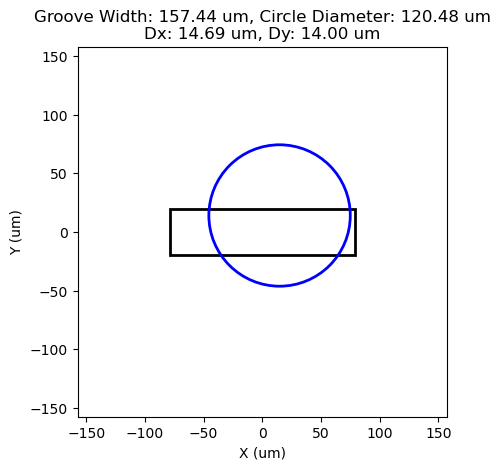

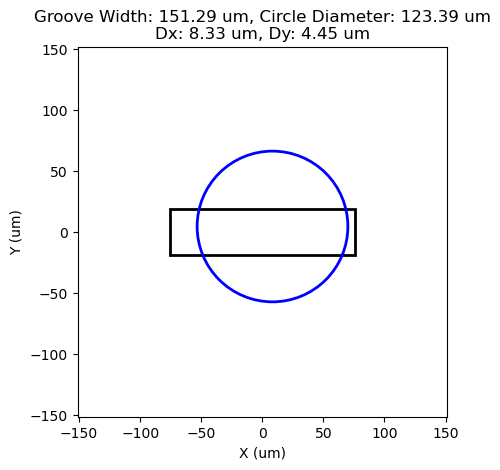

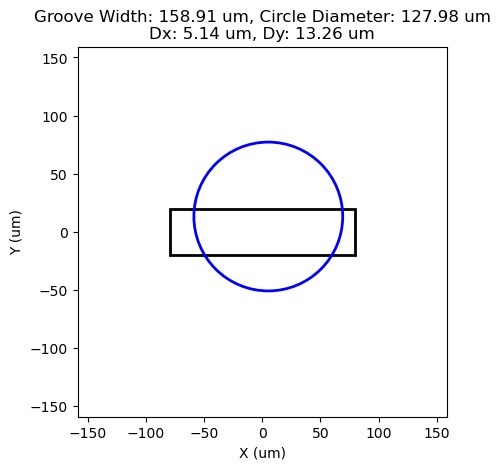

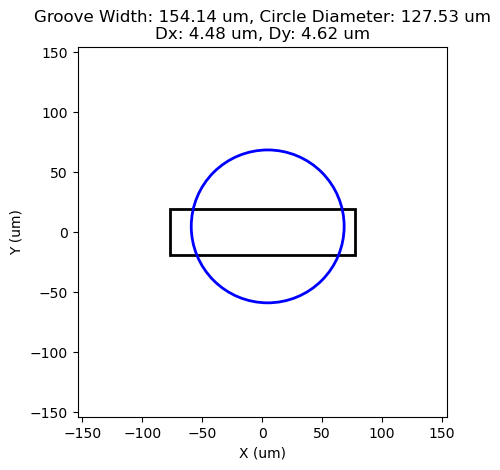

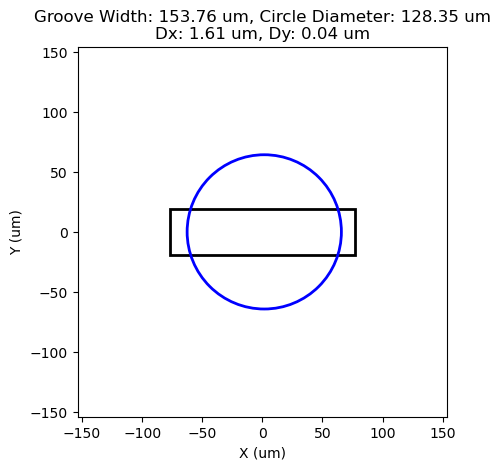

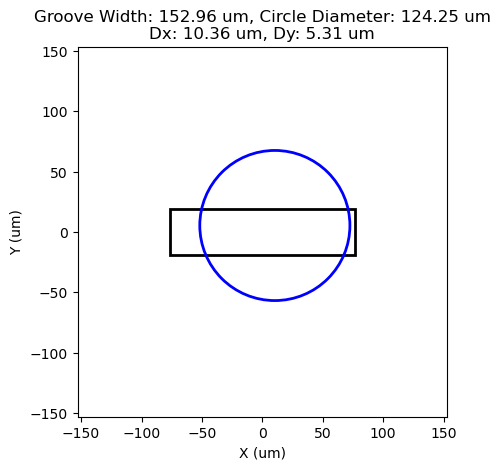

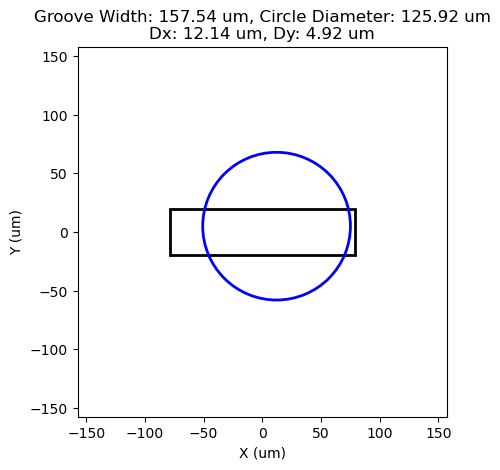

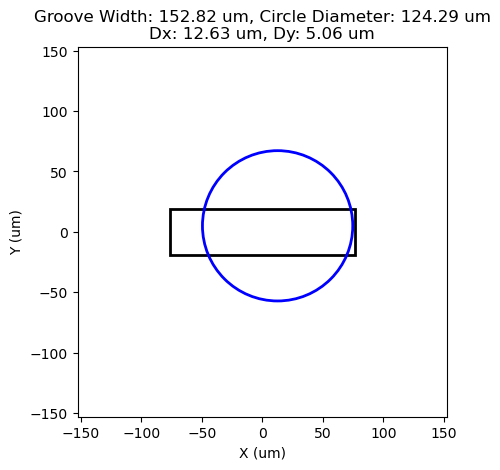

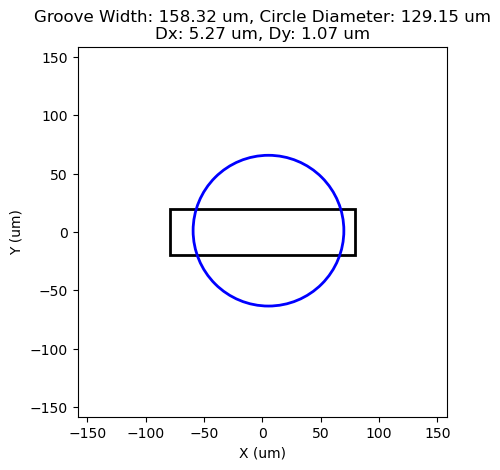

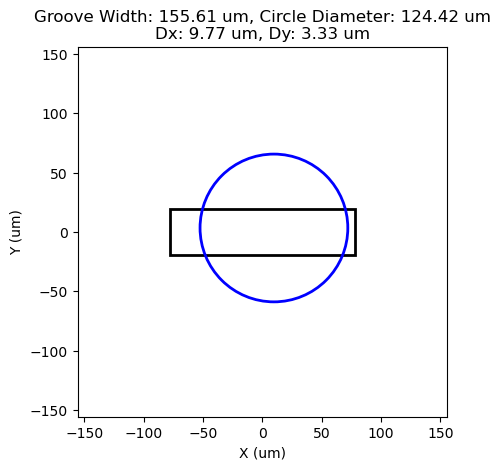

Simulation complete! Results saved to 'simulation_results.csv'.


In [22]:
# Step 5: Run the simulation
def run_simulation():
    # Step 1: Get number of simulations
    num_runs = get_simulation_runs()

    # Step 2: Get width range
    min_width, max_width = get_width_range()

    # Step 3: Get diameter range
    min_diameter, max_diameter = get_diameter_range()

    # Store results in a list
    results = []

    # Perform the simulation
    for i in range(num_runs):
        # Randomly select a groove width and circle diameter
        selected_width = random.uniform(min_width, max_width)
        selected_diameter = random.uniform(min_diameter, max_diameter)

        # Calculate offsets Dx and Dy
        Dx, Dy = calculate_offset(selected_width, selected_diameter)

        # Store the results
        results.append([selected_width, selected_diameter, Dx, Dy])

        # Optional: Visualize a few selected runs
        if i % (num_runs // 10) == 0:  # Visualize every 10% of the runs
            plot_circle_in_groove(selected_width, selected_diameter, Dx, Dy)

    # Convert results to a pandas DataFrame
    df = pd.DataFrame(results, columns=['Width (um)', 'Diameter (um)', 'Dx (um)', 'Dy (um)'])

    # Save to a CSV file
    df.to_csv('simulation_results.csv', index=False)

    print(f"Simulation complete! Results saved to 'simulation_results.csv'.")

# Run the simulation
if __name__ == "__main__":
    run_simulation()

In [24]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('simulation_results.csv')

# Display the first few rows of the data
df


,Width (um),Diameter (um),Dx (um),Dy (um)
0,157.441717,120.482426,14.685801,13.997265
1,153.117273,126.538307,10.519169,8.645572
2,158.475155,128.963996,10.416329,4.990103
3,156.311135,125.661545,8.993332,1.232057
4,151.138276,127.872054,6.197405,0.781152
...,...,...,...,...
19995,155.008857,124.686975,9.508557,8.581967
19996,153.506717,122.900226,7.403887,10.808509
19997,153.945478,121.897281,11.387114,4.623935
19998,156.363238,125.818975,4.058723,1.245254
